In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el dataset sin etiquetas
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/House_Price_dataset.csv')

# Mostrar las primeras filas del dataset
print(data.head())

   property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamaba

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
#convierte todos los datos objeto a int
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [6]:
for columna in columnas_categoricas:
    data[columna] = data[columna].astype(str)

In [7]:
from sklearn.preprocessing import LabelEncoder

for columna in columnas_categoricas:
    le = LabelEncoder()
    data[columna] = le.fit_transform(data[columna])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  int64  
 3   property_type  168446 non-null  int64  
 4   price          168446 non-null  int64  
 5   location       168446 non-null  int64  
 6   city           168446 non-null  int64  
 7   province_name  168446 non-null  int64  
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  int64  
 12  purpose        168446 non-null  int64  
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  int64  
 15  agency         168446 non-null  int64  
 16  agent          168446 non-null  int64  
 17  Area Type      168446 non-nul

In [18]:
#se seleccionan las columnas para los clustering en este caso escogi la columna precio
#y las ciudades en donde estan hubicadas las casas
X = data.iloc[:, [4, 6]].values

In [19]:
print(X)

[[10000000        1]
 [ 6900000        1]
 [16500000        1]
 ...
 [27000000        2]
 [11000000        2]
 [ 9000000        2]]


In [20]:
print("Número de muestras en el dataset:", X.shape[0])

Número de muestras en el dataset: 168446


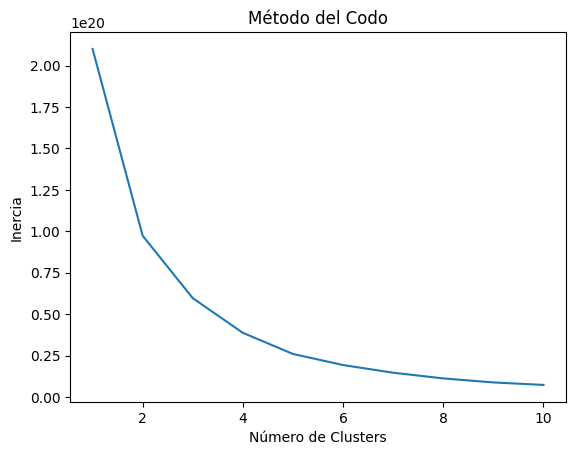

In [21]:
#utilizacion del metodo codo para determinar el numero de los cluster se busca diferentes en el rango de 1 al 10
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
y = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  y.append(kmeans.inertia_)
plt.plot(range(1, 11), y)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [13]:
#entrena el modelo con el cluster mas optimo que en este caso es 4
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

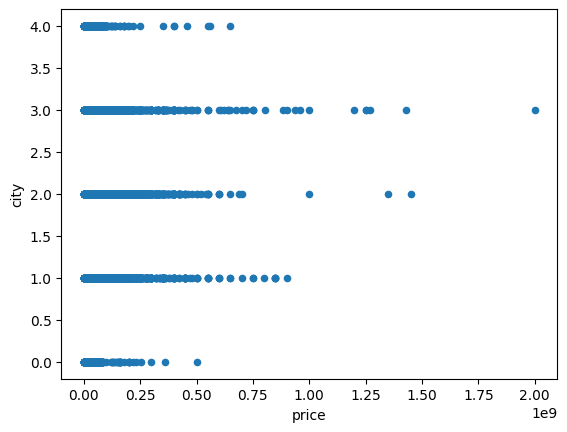

In [30]:
#se grafica los datos originales que utilizan las columnas 'price' y 'city'
data.plot.scatter(x='price', y='city')
plt.show()

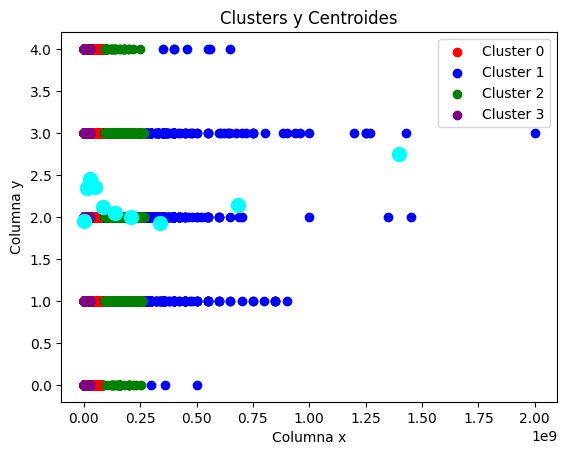

In [31]:
#se visualiza los clusters y sus centroides utilizando diferentes colores para cada cluster y celeste para los centroides
col = ['red', 'blue', 'green', 'purple']
for clust in range(4):
  plt.scatter(X[y_kmeans == clust, 0], X[y_kmeans == clust, 1], c=col[clust], label=f"Cluster {clust}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan')
plt.legend()
plt.xlabel('Columna x')
plt.ylabel('Columna y')
plt.title('Clusters y Centroides')
plt.show()

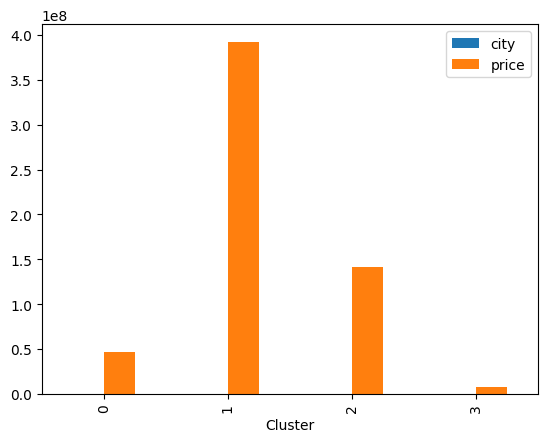

In [32]:
#se incluye los datos de los clusters encontrados al dataset original.
data['Cluster'] = y_kmeans
#luego agrupa los datos por clusters con los valores medios de 'city' y 'price' para cada cluster.
data.groupby('Cluster')[['city', 'price']].mean().plot.bar()
plt.show()